### Set up the Notebook

In [1]:
# Import Necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import Data Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_kansas.csv
/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_washington.csv
/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_Kentucky.csv
/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_Okstate.csv
/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_memphis.csv
/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_utah.csv
/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_Duke.csv
/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_georgia.csv
/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_lsu.csv
/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_arizona.csv


- Note: I've picked up this dataset /kaggle/input/draft-picks-from-each-university, it has 10 csv files from each University, I'll merge the 10 files all togheter.

In [2]:
# List of file paths
file_paths = [
    "/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_Duke.csv",
    "/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_Kentucky.csv",
    "/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_Okstate.csv",
    "/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_arizona.csv",
    "/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_georgia.csv",
    "/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_kansas.csv",
    "/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_lsu.csv",
    "/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_memphis.csv",
    "/kaggle/input/draft-picks-from-each-university/Draft_Picks_From_washington.csv"
]

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through the file paths and read each CSV file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames into one
data = pd.concat(dataframes, ignore_index=True)

# Now, 'data' contains the merged data from all the CSV files


#### Initial Inspection of the DataFrame

In [3]:
# Display the first 10 rows
print("First 10 rows")
data.head(10)

First 10 rows


,Player,Year,Rd,Overall,From,To,G,MP,FG,FGA,...,TOV,PF,PTS,FG%,3P%,FT%,MP/G,PTS/G,TRB/G,AST/G
0,Elton Brand,1999,1,1.0,2000.0,2016.0,1058.0,34910.0,6599.0,13185.0,...,2060.0,3115.0,16827.0,0.500,0.095,0.736,33.0,15.9,8.5,2.1
1,Grant Hill *,1994,1,3.0,1995.0,2013.0,1026.0,34776.0,6345.0,13126.0,...,2459.0,2377.0,17137.0,0.483,0.314,0.769,33.9,16.7,6.0,4.1
2,Mike Dunleavy,2002,1,3.0,2003.0,2017.0,986.0,27340.0,3935.0,8926.0,...,1369.0,1986.0,11048.0,0.441,0.377,0.803,27.7,11.2,4.3,2.2
3,Shane Battier,2001,1,6.0,2002.0,2014.0,977.0,30004.0,2982.0,6819.0,...,878.0,2208.0,8408.0,0.437,0.384,0.743,30.7,8.6,4.2,1.8
4,J.J. Redick,2006,1,11.0,2007.0,2021.0,940.0,23964.0,4009.0,8976.0,...,1040.0,1417.0,12028.0,0.447,0.415,0.892,25.5,12.8,2.0,2.0
5,Mike Gminski,1980,1,7.0,1981.0,1994.0,938.0,24058.0,4208.0,9047.0,...,1368.0,1574.0,10953.0,0.465,0.122,0.843,25.6,11.7,6.9,1.3
6,Danny Ferry,1989,1,2.0,1991.0,2003.0,917.0,18133.0,2505.0,5615.0,...,811.0,1964.0,6439.0,0.446,0.393,0.840,19.8,7.0,2.8,1.3
7,Luol Deng,2004,1,7.0,2005.0,2019.0,902.0,30941.0,5130.0,11257.0,...,1459.0,1499.0,13361.0,0.456,0.332,0.769,34.3,14.8,6.1,2.3
8,Christian Laettner,1992,1,3.0,1993.0,2005.0,868.0,25760.0,4036.0,8405.0,...,1932.0,2768.0,11121.0,0.480,0.261,0.820,29.7,12.8,6.7,2.6
9,Carlos Boozer,2002,2,35.0,2003.0,2015.0,861.0,26901.0,5847.0,11221.0,...,1824.0,2612.0,13976.0,0.521,0.071,0.722,31.2,16.2,9.5,2.2


In [4]:
# Check for the columns
data.columns

Index(['Player', 'Year', 'Rd', 'Overall', 'From', 'To', 'G', 'MP', 'FG', 'FGA',
       '3P', '3PA', 'FT', 'FTA', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PTS', 'FG%', '3P%', 'FT%', 'MP/G', 'PTS/G', 'TRB/G', 'AST/G'],
      dtype='object')

In [5]:
# Display the last few rows
data.tail()

,Player,Year,Rd,Overall,From,To,G,MP,FG,FGA,...,TOV,PF,PTS,FG%,3P%,FT%,MP/G,PTS/G,TRB/G,AST/G
643,Doug Smart,1959,7,50,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,George Spencer,1967,19,161,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
645,Kim Stewart,1978,6,126,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
646,Bill Vandenburgh,1949,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
647,Brad Watson,1983,5,109,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Check the Shape of the data
num_rows, num_columns = data.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 648
Number of Columns: 29


In [7]:
# Display the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 29 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   648 non-null    object 
 1   Year     647 non-null    object 
 2   Rd       647 non-null    object 
 3   Overall  615 non-null    object 
 4   From     407 non-null    float64
 5   To       407 non-null    float64
 6   G        407 non-null    float64
 7   MP       402 non-null    float64
 8   FG       407 non-null    float64
 9   FGA      407 non-null    float64
 10  3P       357 non-null    float64
 11  3PA      357 non-null    float64
 12  FT       407 non-null    float64
 13  FTA      407 non-null    float64
 14  ORB      373 non-null    float64
 15  TRB      404 non-null    float64
 16  AST      407 non-null    float64
 17  STL      361 non-null    float64
 18  BLK      361 non-null    float64
 19  TOV      368 non-null    float64
 20  PF       407 non-null    float64
 21  PTS      407 non

#### Summary Statistics

In [8]:
# Include non-numeric columns in the summary statistics.
data.describe(include="all")

,Player,Year,Rd,Overall,From,To,G,MP,FG,FGA,...,TOV,PF,PTS,FG%,3P%,FT%,MP/G,PTS/G,TRB/G,AST/G
count,648,647.0,647.0,615.0,407.000000,407.000000,407.000000,402.000000,407.000000,407.000000,...,368.000000,407.000000,407.000000,406.000000,304.000000,403.000000,402.000000,407.000000,404.000000,407.000000
unique,588,153.0,40.0,234.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Dejounte Murray,1986.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,12.0,127.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1996.793612,2002.100737,343.948403,8515.691542,1467.245700,3208.982801,...,505.915761,776.781327,3877.619165,0.442909,0.273076,0.723166,19.652488,8.529975,3.638861,1.791155
std,NaN,NaN,NaN,NaN,20.490937,20.808704,295.591600,9238.298413,1873.747545,3945.779086,...,608.479488,809.042646,4954.256297,0.071941,0.115758,0.126479,8.639110,5.555576,2.515589,1.460572
min,NaN,NaN,NaN,NaN,1948.000000,1949.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.083000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1982.000000,1986.000000,103.000000,1395.000000,178.000000,413.500000,...,78.000000,163.000000,455.500000,0.412250,0.231000,0.668000,13.125000,4.500000,1.900000,0.700000
50%,NaN,NaN,NaN,NaN,2001.000000,2009.000000,252.000000,5168.500000,709.000000,1599.000000,...,258.500000,479.000000,1826.000000,0.442000,0.317000,0.743000,19.750000,7.400000,3.000000,1.300000
75%,NaN,NaN,NaN,NaN,2014.000000,2022.000000,540.000000,13364.000000,2130.500000,4671.500000,...,735.000000,1212.000000,5508.000000,0.474750,0.352250,0.798000,25.875000,11.200000,4.700000,2.400000


In [9]:
# Generate Summary Statistics for Numerical Columns
data.describe()

,From,To,G,MP,FG,FGA,3P,3PA,FT,FTA,...,TOV,PF,PTS,FG%,3P%,FT%,MP/G,PTS/G,TRB/G,AST/G
count,407.000000,407.000000,407.000000,402.000000,407.000000,407.000000,357.000000,357.000000,407.000000,407.000000,...,368.000000,407.000000,407.000000,406.000000,304.000000,403.000000,402.000000,407.000000,404.000000,407.000000
mean,1996.793612,2002.100737,343.948403,8515.691542,1467.245700,3208.982801,210.028011,602.092437,758.901720,1012.299754,...,505.915761,776.781327,3877.619165,0.442909,0.273076,0.723166,19.652488,8.529975,3.638861,1.791155
std,20.490937,20.808704,295.591600,9238.298413,1873.747545,3945.779086,341.535321,934.121594,1100.777618,1513.358446,...,608.479488,809.042646,4954.256297,0.071941,0.115758,0.126479,8.639110,5.555576,2.515589,1.460572
min,1948.000000,1949.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.083000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1982.000000,1986.000000,103.000000,1395.000000,178.000000,413.500000,2.000000,14.000000,84.000000,123.500000,...,78.000000,163.000000,455.500000,0.412250,0.231000,0.668000,13.125000,4.500000,1.900000,0.700000
50%,2001.000000,2009.000000,252.000000,5168.500000,709.000000,1599.000000,37.000000,127.000000,313.000000,430.000000,...,258.500000,479.000000,1826.000000,0.442000,0.317000,0.743000,19.750000,7.400000,3.000000,1.300000
75%,2014.000000,2022.000000,540.000000,13364.000000,2130.500000,4671.500000,299.000000,864.000000,999.000000,1336.500000,...,735.000000,1212.000000,5508.000000,0.474750,0.352250,0.798000,25.875000,11.200000,4.700000,2.400000
max,2023.000000,2023.000000,1343.000000,47859.000000,12681.000000,23497.000000,2143.000000,5816.000000,6918.000000,11862.000000,...,3532.000000,4146.000000,31419.000000,1.000000,0.500000,1.000000,45.800000,30.100000,22.900000,8.900000


#### Calculate the percentage of Missing values in the DataFrame

In [10]:
# Calculate the total number of missing values in each column
missing_values = data.isnull().sum()

# Calculate the total number of values in each column
total_values = data.shape[0]

# Calculate the percentage of missing values for each column
percentage_missing = (missing_values / total_values) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': percentage_missing.values
})

# Sort the DataFrame by the percentage of missing values (descending order)
missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

# Display the summary
print(missing_data_summary)


     Column  Missing Values  Percentage Missing
23      3P%             344           53.086420
10       3P             291           44.907407
11      3PA             291           44.907407
17      STL             287           44.290123
18      BLK             287           44.290123
19      TOV             280           43.209877
14      ORB             275           42.438272
25     MP/G             246           37.962963
7        MP             246           37.962963
24      FT%             245           37.808642
27    TRB/G             244           37.654321
15      TRB             244           37.654321
22      FG%             242           37.345679
26    PTS/G             241           37.191358
21      PTS             241           37.191358
20       PF             241           37.191358
28    AST/G             241           37.191358
16      AST             241           37.191358
13      FTA             241           37.191358
12       FT             241           37

#### Total Percentage of the DataFrame

In [11]:
# Calculate the total number of missing values in the entire DataFrame
total_missing = data.isnull().sum().sum()

# Calculate the total number of values in the DataFrame
total_values = data.size

# Calculate the total percentage of missing values
total_percentage_missing = (total_missing / total_values) * 100

# Display the total percentage of missing values
print(f"Total Percentage of Missing Values: {total_percentage_missing:.2f}%")

Total Percentage of Missing Values: 34.32%


#### Count Missing values

In [12]:
data.isnull().sum()

Player       0
Year         1
Rd           1
Overall     33
From       241
To         241
G          241
MP         246
FG         241
FGA        241
3P         291
3PA        291
FT         241
FTA        241
ORB        275
TRB        244
AST        241
STL        287
BLK        287
TOV        280
PF         241
PTS        241
FG%        242
3P%        344
FT%        245
MP/G       246
PTS/G      241
TRB/G      244
AST/G      241
dtype: int64

In [13]:
# Get the total of Missing values
data.isnull().sum().sum()

6449

In [14]:
# Create a DataFrame of Boolean values indicating non-missing values.
data.notnull()

,Player,Year,Rd,Overall,From,To,G,MP,FG,FGA,...,TOV,PF,PTS,FG%,3P%,FT%,MP/G,PTS/G,TRB/G,AST/G
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
644,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
645,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
646,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Data Cleaning

In [15]:
# Replace all missing values in the entire DataFrame with zeros
data.fillna(0, inplace=True)

#### Unique Values

In [16]:
# Check the Unique values of the column 'Player'
data['Player'].value_counts()

Player
Dejounte Murray    2
Gordon Harris      2
Ralph Bishop       2
Bruno Boin         2
Jay Bond           2
                  ..
Doron Lamb         1
Ralph Beard        1
Alex Groza         1
Nick Richards      1
John Wallisa       1
Name: count, Length: 588, dtype: int64

In [17]:
# Calculate the correlation between two specific columns.
data['MP'].corr(data['FGA'])

0.9697089437047212

<Axes: >

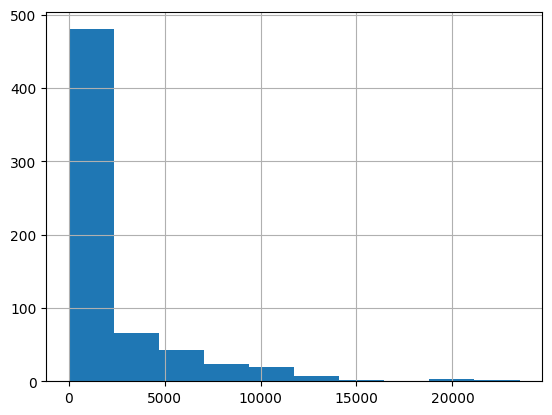

In [18]:
# Histograms and Plots:
data['FGA'].hist()

<Axes: >

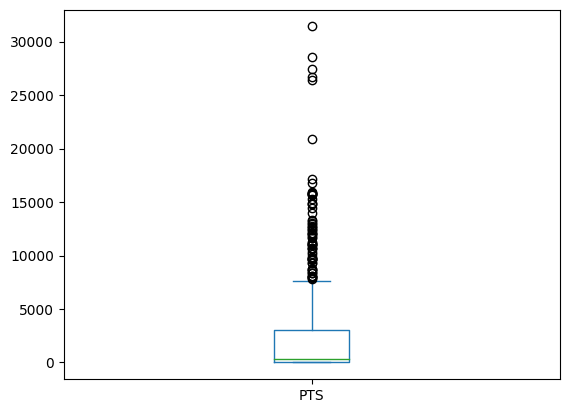

In [19]:
# Create a box plot to visualize the distribution and detect outliers.
data['PTS'].plot(kind='box')

#### Duplicates

In [20]:
# Identify duplicated rows.
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
643     True
644     True
645     True
646     True
647     True
Length: 648, dtype: bool

In [21]:
# Show duplicated rows
data[data.duplicated()]

,Player,Year,Rd,Overall,From,To,G,MP,FG,FGA,...,TOV,PF,PTS,FG%,3P%,FT%,MP/G,PTS/G,TRB/G,AST/G
589,James Edwards,1977,3,46,1978.0,1996.0,1168.0,28356.0,5802.0,11724.0,...,1931.0,4042.0,14862.0,0.495,0.000,0.698,24.3,12.7,5.1,1.3
590,Detlef Schrempf,1985,1,8,1986.0,2001.0,1136.0,33597.0,5400.0,10995.0,...,2268.0,3360.0,15761.0,0.491,0.384,0.803,29.6,13.9,6.2,3.4
591,Terrence Ross,2012,1,8,2013.0,2023.0,733.0,17956.0,2940.0,7032.0,...,700.0,1230.0,8047.0,0.418,0.362,0.837,24.5,11.0,2.8,1.3
592,Steve Hawes,1972,2,24,1975.0,1984.0,688.0,15831.0,2337.0,4836.0,...,821.0,1886.0,5768.0,0.483,0.000,0.790,23.0,8.4,6.2,1.9
593,Spencer Hawes,2007,1,10,2008.0,2017.0,684.0,15541.0,2451.0,5363.0,...,971.0,1709.0,5932.0,0.457,0.350,0.716,22.7,8.7,5.7,1.9
594,Nate Robinson,2005,1,21,2006.0,2016.0,618.0,13878.0,2458.0,5811.0,...,876.0,1482.0,6807.0,0.423,0.360,0.796,22.5,11.0,2.3,3.0
595,Isaiah Thomas,2011,2,60,2012.0,2022.0,550.0,15563.0,3167.0,7291.0,...,1242.0,1146.0,9715.0,0.434,0.362,0.872,28.3,17.7,2.4,4.8
596,Jack Nichols,1948,1,12,1949.0,1958.0,505.0,10703.0,2022.0,5493.0,...,0.0,1518.0,5269.0,0.368,0.000,0.752,26.9,10.4,6.9,1.9
597,Dejounte Murray,2016,1,29,2017.0,2023.0,394.0,10950.0,2240.0,4896.0,...,754.0,702.0,5508.0,0.458,0.335,0.784,27.8,14.0,5.9,5.0
598,Charles Dudley,1972,5,76,1973.0,1979.0,361.0,6337.0,686.0,1380.0,...,227.0,722.0,1908.0,0.497,0.000,0.672,17.6,5.3,3.0,3.4


#### Career Statistics:

- Who has the highest career points (PTS)?
 

In [22]:
max_career_pts_player = data[data['PTS'] == data['PTS'].max()]['Player'].values[0]
max_career_pts = data['PTS'].max()
print(f"{max_career_pts_player} has the highest career points with {max_career_pts} points.")

Wilt Chamberlain * has the highest career points with 31419.0 points.


#### Efficiency Metrics:


- What is the average field goal percentage (FG%) for all players?


In [23]:
avg_fg_percentage = data['FG%'].mean()
print(f"Average FG% for all players: {avg_fg_percentage:.2%}")

Average FG% for all players: 27.75%


#### Top Performers:


- Who are the top 5 players with the highest points per game (PTS/G)?

In [24]:
top_pts_per_game_players = data.nlargest(5, 'PTS/G')[['Player', 'PTS/G']]
print("Top 5 Players by PTS/G:")
print(top_pts_per_game_players)

Top 5 Players by PTS/G:
                  Player  PTS/G
386   Wilt Chamberlain *   30.1
413          Joel Embiid   27.2
477         Bob Pettit *   26.4
58       Zion Williamson   25.8
345  Dominique Wilkins *   24.8


#### Distribution of Statistics:


- What is the distribution of points (PTS) across all players?


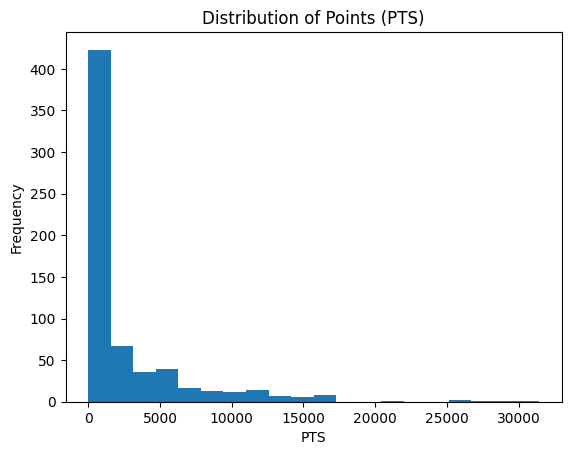

In [25]:
import matplotlib.pyplot as plt
plt.hist(data['PTS'], bins=20)
plt.xlabel('PTS')
plt.ylabel('Frequency')
plt.title('Distribution of Points (PTS)')
plt.show()

#### Player Comparison:


- Compare the career statistics of two specific players (replace 'Player1' and 'Player2' with actual player names):

In [26]:
player1_stats = data[data['Player'] == 'Elton Brand']
player2_stats = data[data['Player'] == 'Grant Hill *']

#### Player Career Duration:

- Calculate the career duration for each player (From - To) and analyze the distribution.

In [27]:
data['Career Duration'] = data['To'] - data['From']
career_duration_distribution = data['Career Duration'].value_counts()
print(career_duration_distribution)

Career Duration
0.0     297
2.0      45
3.0      41
4.0      33
1.0      32
5.0      31
10.0     28
9.0      24
6.0      23
7.0      22
8.0      21
11.0     15
12.0      9
13.0      9
14.0      7
18.0      5
15.0      3
16.0      2
17.0      1
Name: count, dtype: int64


#### Data Visualization!

In [28]:
 # Interactive scatter plot to visualize the relationship between 'PTS' and 'AST'
fig1 = px.scatter(data, x='PTS', y='AST', title='Scatter Plot of PTS vs. AST')
fig1.show()

In [29]:
# Interactive histogram of 'PTS'
fig2 = px.histogram(data, x='PTS', title='Histogram of PTS')
fig2.show()

In [30]:
# Interactive scatter matrix to visualize relationships between multiple numeric columns
fig5 = px.scatter_matrix(data, dimensions=['PTS', 'AST', 'TRB', 'STL'], title='Scatter Matrix')
fig5.show()

In [31]:
# Interactive scatter plot matrix for selected statistics
fig7 = px.scatter_matrix(data, dimensions=['PTS', 'AST', 'TRB', 'STL'], color='Year', title='Scatter Matrix by Year')
fig7.show()

In [32]:
# Interactive bar chart of the top 10 players with the most points (PTS)
import plotly.express as px
top_10_pts_players = data.nlargest(10, 'PTS')[['Player', 'PTS']]
fig8 = px.bar(top_10_pts_players, x='Player', y='PTS', title='Top 10 Players by PTS', color='Player')
fig8.show()


In [33]:
import plotly.express as px
#  Interactive bar chart of the top 10 players with the most assists (AST) with different colors
top_10_ast_players = data.nlargest(10, 'AST')[['Player', 'AST']]
fig13 = px.bar(top_10_ast_players, x='Player', y='AST', title='Top 10 Players by AST', color='Player')
fig13.show()
